In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('imbd_cleaned.csv')

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['rating'])

## Data Partitioning

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=100, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36725127837086213
F1-score [0.         0.         0.00516796 0.00383509 0.02125399 0.27648202
 0.32591205 0.52907553 0.09114359 0.03255485]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.03      0.00      0.01       353
      (3, 4]       0.12      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.02      2719
      (5, 6]       0.29      0.27      0.28      6372
      (6, 7]       0.32      0.33      0.33     11643
      (7, 8]       0.42      0.72      0.53     14463
      (8, 9]       0.24      0.06      0.09      6563
     (9, 10]       0.17      0.02      0.03      1281

    accuracy                           0.37     44588
   macro avg       0.19      0.14      0.13     44588
weighted avg       0.32      0.37      0.31     44588



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [ ]:
# !pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np

def convert_interval_to_numeric(interval):
    # Rimuovi le parentesi e dividi per la virgola
    lower, upper = interval[1:-1].split(', ')
    # Converti in float e calcola il punto medio
    return int(lower)

# Applica la conversione a y_train e y_test
y_train_numeric = np.array([convert_interval_to_numeric(interval) for interval in y_train])
y_test_numeric = np.array([convert_interval_to_numeric(interval) for interval in y_test])

print("y_train convertito:", y_train_numeric)
print("y_test convertito:", y_test_numeric)


y_train convertito: [6 7 3 ... 6 7 7]
y_test convertito: [9 3 7 ... 6 6 5]


In [10]:
from xgboost import XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Definisci il modello
clf = XGBClassifier(objective='binary:logistic', tree_method='exact', use_label_encoder=True, random_state=42)

# Definisci la griglia di parametri
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# Specifica il numero di iterazioni
n_iter = 50 # Puoi modificare questo valore in base alle tue esigenze

random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring='accuracy',
                                   cv=3, verbose=2, n_jobs=-1, n_iter=n_iter, error_score='raise'
                                   )

# Esegui la random search
random_search.fit(X_train, y_train_numeric)

# Stampa i migliori parametri
print("Migliori parametri trovati:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Migliori parametri trovati: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Miglior punteggio: 0.4564661552953842


In [11]:

# Definisci il modello con i migliori iperparametri trovati
best_model = XGBClassifier(
    objective='binary:logistic',
    tree_method='exact',
    random_state=42,
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.2,
    gamma=0.1,
    colsample_bytree=0.8, probability=True
)

# Addestra il modello con i dati di addestramento
best_model.fit(X_train, y_train_numeric)

# evals_result = best_model.evals_result()
# epochs = len(evals_result['validation_0']['logloss'])
# print("Numero medio di epoch del miglior modello:", epochs)

c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:27:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "probability" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred = best_model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_numeric, y_pred))
print('F1-score %s' % f1_score(y_test_numeric, y_pred, average=None))
print(classification_report(y_test_numeric, y_pred))

Accuracy 0.47344827586206895
F1-score [0.17391304 0.18181818 0.09646856 0.18370607 0.29751791 0.36704786
 0.4335101  0.6146718  0.40020546 0.45505421]
              precision    recall  f1-score   support

           0       0.36      0.11      0.17        70
           1       0.55      0.11      0.18       376
           2       0.26      0.06      0.10       942
           3       0.34      0.13      0.18      2738
           4       0.38      0.25      0.30      7250
           5       0.38      0.35      0.37     16991
           6       0.42      0.45      0.43     31049
           7       0.55      0.69      0.61     38568
           8       0.46      0.36      0.40     17501
           9       0.56      0.38      0.46      3415

    accuracy                           0.47    118900
   macro avg       0.43      0.29      0.32    118900
weighted avg       0.46      0.47      0.46    118900



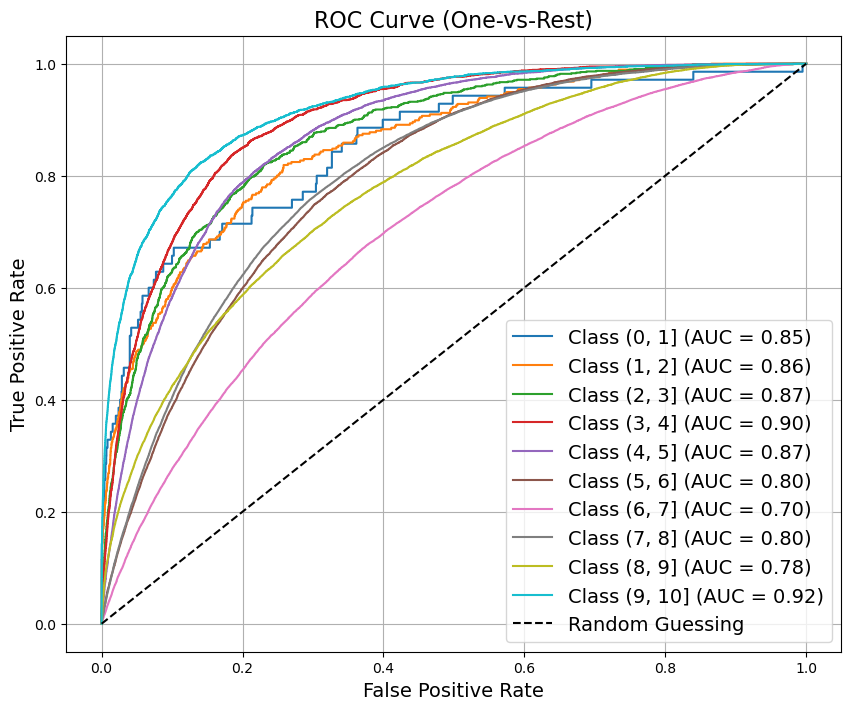

In [13]:
# Calcola la ROC curve e la Precision-Recall curve
y_pred_proba = best_model.predict_proba(X_test)

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid()
plt.show()

In [14]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr", average="macro")

0.8357283694257841

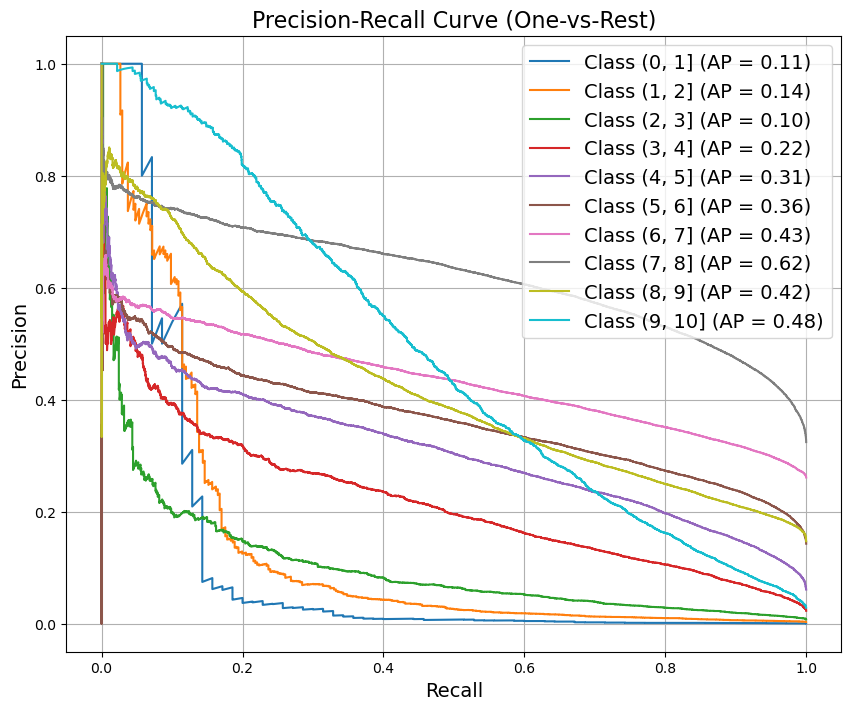

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)",fontsize=16)
plt.legend(loc="best",fontsize=14)
plt.grid()
plt.show()